https://developers.naver.com/docs/clova/api/CFR/API_Guide.md#Overview

In [34]:
!pip install pillow

In [35]:
!pip install requests

In [36]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

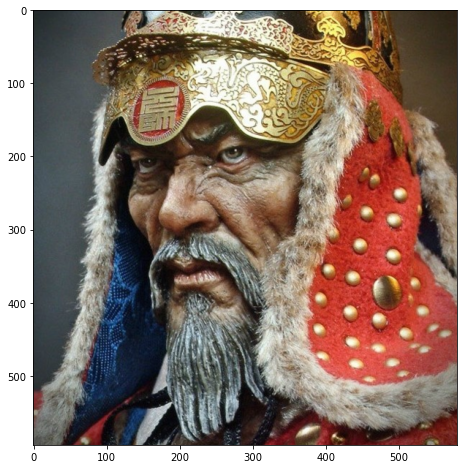

In [37]:
img = mpimg.imread('1-1.png')

plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()

In [38]:
import requests

In [39]:
client_id = "AJj1g19VDMUEPfuhWX1J"
client_secret = "TqsnGMK_xn"

url = "https://openapi.naver.com/v1/vision/celebrity"
files = {'image':open('1-1.png','rb')}

headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret':client_secret}

response = requests.post(url, files=files, headers=headers)

In [40]:
import json

In [41]:
parsed=json.loads(response.text)
print(json.dumps(parsed, indent=4, sort_keys=False, ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 580,
            "height": 595
        },
        "faceCount": 1
    },
    "faces": [
        {
            "celebrity": {
                "value": "최종원",
                "confidence": 0.24428
            }
        }
    ]
}


In [42]:
url="https://openapi.naver.com/v1/vision/face"
files={'image':open('1-1.png','rb')}

headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret':client_secret}

response = requests.post(url, files=files, headers=headers)
parsed = json.loads(response.text)
print(json.dumps(parsed, indent=4, sort_keys=False, ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 580,
            "height": 595
        },
        "faceCount": 1
    },
    "faces": [
        {
            "roi": {
                "x": 124,
                "y": 156,
                "width": 256,
                "height": 256
            },
            "landmark": null,
            "gender": {
                "value": "male",
                "confidence": 0.999898
            },
            "age": {
                "value": "72~76",
                "confidence": 0.095292
            },
            "emotion": {
                "value": "neutral",
                "confidence": 0.976685
            },
            "pose": {
                "value": "false_face",
                "confidence": 0.911927
            }
        }
    ]
}


In [43]:
detect_result=parsed

In [44]:
detect_result.keys()

dict_keys(['info', 'faces'])

In [45]:
detect_result['faces']

[{'roi': {'x': 124, 'y': 156, 'width': 256, 'height': 256},
  'landmark': None,
  'gender': {'value': 'male', 'confidence': 0.999898},
  'age': {'value': '72~76', 'confidence': 0.095292},
  'emotion': {'value': 'neutral', 'confidence': 0.976685},
  'pose': {'value': 'false_face', 'confidence': 0.911927}}]

In [46]:
detect_result['faces'][0]

{'roi': {'x': 124, 'y': 156, 'width': 256, 'height': 256},
 'landmark': None,
 'gender': {'value': 'male', 'confidence': 0.999898},
 'age': {'value': '72~76', 'confidence': 0.095292},
 'emotion': {'value': 'neutral', 'confidence': 0.976685},
 'pose': {'value': 'false_face', 'confidence': 0.911927}}

In [47]:
detect_result['faces'][0]['roi']

{'x': 124, 'y': 156, 'width': 256, 'height': 256}

In [48]:
detect_result['faces'][0]['gender']

{'value': 'male', 'confidence': 0.999898}

In [49]:
detect_result['faces'][0]['age']

{'value': '72~76', 'confidence': 0.095292}

In [50]:
detect_result['faces'][0]['emotion']

{'value': 'neutral', 'confidence': 0.976685}

In [51]:
x,y,w,h=detect_result['faces'][0]['roi'].values()
gender, confidence = detect_result['faces'][0]['gender'].values()
emotion, emotion_confidence = detect_result['faces'][0]['emotion'].values()
age, age_confidence=detect_result['faces'][0]['age'].values()

In [52]:
annotation=gender+':'+str(confidence)+'\n'+emotion+':'+str(emotion_confidence)

In [53]:
import matplotlib.patches as patches

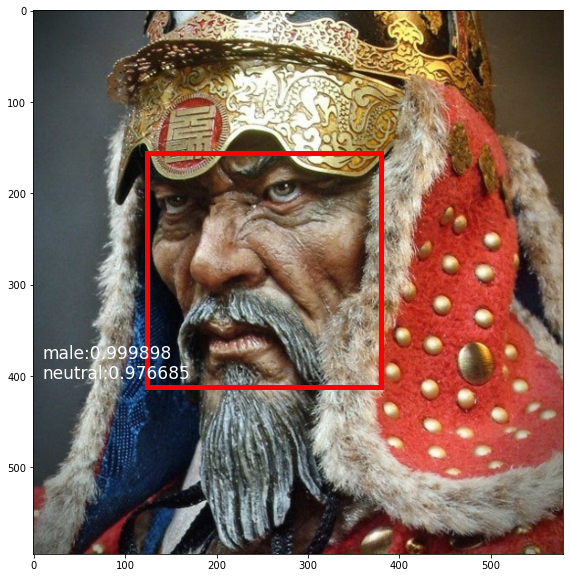

In [54]:
img = mpimg.imread('1-1.png')

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img)

rect_face = patches.Rectangle((x,y),w,h, linewidth=5, edgecolor='r', facecolor='none')
ax.add_patch(rect_face)

plt.text(10,400, annotation, wrap=True, fontsize=17, color='white')
plt.show()

In [55]:
img = mpimg.imread('')

fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(img)


for each in detect_result['faces']:
    
    x, y, w, h = each['roi'].values()
    gender, confidence = each['gender'].values()
    emotion, emotion_confidence = each['emotion'].values()

    rect_face = patches.Rectangle((x,y),w,h, linewidth=5, edgecolor='r', facecolor='none')
    annotation = gender+':'+str(confidence)+'\n'+emotion+':'+str(emotion_confidence)
    plt.text(x,y+h+40, annotation, wrap=True, fontsize=17, color='white')
    ax.add_patch(rect_face)

    
plt.show()

AttributeError: 'str' object has no attribute 'read'